In [1]:
def avg_cost(x, *params):
    '''
    This function returns the average cost of x given the parameters.
    
    Args:
        x: scalar, the amount of output
        params: tuple containing model parameters
        
    Returns:
        ac: scalar, the average cost of producing x units
    '''
    
    a, b, c = params
    ac = a * (x ** -1) + b + c * x
    
    return ac

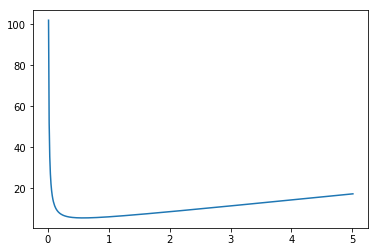

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

a, b, c = 1, 2, 3
params = (a, b, c)

# define x grid
import numpy as np
x = np.linspace(0.01, 5.01, num=500)

ac = avg_cost(x, *params)
plt.plot(x, ac)

In [22]:
import scipy.optimize as opt
x_min = opt.minimize_scalar(avg_cost, bracket = [0.1, 2], args=params,
                            method='Golden', tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  0.5773502648532614
The min of f(x) found analytically is  0.5773502691896257


In [24]:
x_min = opt.minimize_scalar(avg_cost, bracket = [0.1, 2], args=params,
                            method='Brent', tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  0.577350270704
The min of f(x) found analytically is  0.5773502691896257


In [28]:
x_min = opt.minimize(avg_cost, 1.2, args=params, method='Nelder-Mead',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [ 0.57735027]
The min of f(x) found analytically is  0.5773502691896257


In [29]:
x_min

 final_simplex: (array([[ 0.57735027],
       [ 0.57735027]]), array([ 5.46410162,  5.46410162]))
           fun: 5.4641016151377544
       message: 'Optimization terminated successfully.'
          nfev: 124
           nit: 52
        status: 0
       success: True
             x: array([ 0.57735027])

In [30]:
x_min = opt.minimize(avg_cost, 1.2, args=params, method='BFGS',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [ 0.57735026]
The min of f(x) found analytically is  0.5773502691896257


In [31]:
x_min = opt.minimize(avg_cost, 1.2, args=params, method='Newton-CG',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

ValueError: Jacobian is required for Newton-CG method

In [32]:
def jac_ac(x, *params):
    '''
    This fuction computes the jacobian of the avg cost function.
    '''
    a, b, c = params
    
    jac = -1 * a * x ** -2 + c
    
    return jac

In [33]:
def hess_ac(x, *params):
    '''
    This function computes the hessian of the avg cost function.
    '''
    a, b, c = params
    
    hess = 2 * a * x ** -3
    
    return hess

In [36]:
x_min = opt.minimize(avg_cost, 0.7, args=params, jac=jac_ac, hess=hess_ac, method='Newton-CG',
                     tol=1e-15, options={'maxiter': 5000})
print('The minimum of f(x) found numerically is ', x_min['x'])
print('The min of f(x) found analytically is ', (a / c) ** (1 / 2))

The minimum of f(x) found numerically is  [ 0.57735027]
The min of f(x) found analytically is  0.5773502691896257


In [40]:
import time

# set number of iterations
N  = 5000

start = time.time()
for i in range(N):
    x_min = opt.minimize(avg_cost, 0.7, args=params, method='Nelder-Mead',
                     tol=1e-15, options={'maxiter': 5000})
end = time.time()
print('Time for Nelder-Mead = ', end-start)


start = time.time()
for i in range(N):
    x_min = opt.minimize(avg_cost, 0.7, args=params, jac=jac_ac,
                         hess=hess_ac, method='Newton-CG',
                         tol=1e-15, options={'maxiter': 5000})
end = time.time()
print('Time for Newton method = ', end-start)

Time for Nelder-Mead =  11.575551986694336
Time for Newton method =  2.845958948135376


In [38]:
start

1505412516.645352